<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/RegresionLineal_ActividadEcommerc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Ecommerce.csv to Ecommerce.csv
User uploaded file "Ecommerce.csv" with length 87360 bytes


### **1.** Confeccione un notebook, ordenado y reproducible, en donde realizará un modelamiento regresivo de aprendizaje de máquina utilizando la librería SK Learn.



In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Ecommerce.csv')

In [4]:
df.shape

(500, 8)

In [6]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [26]:
data_soporte = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

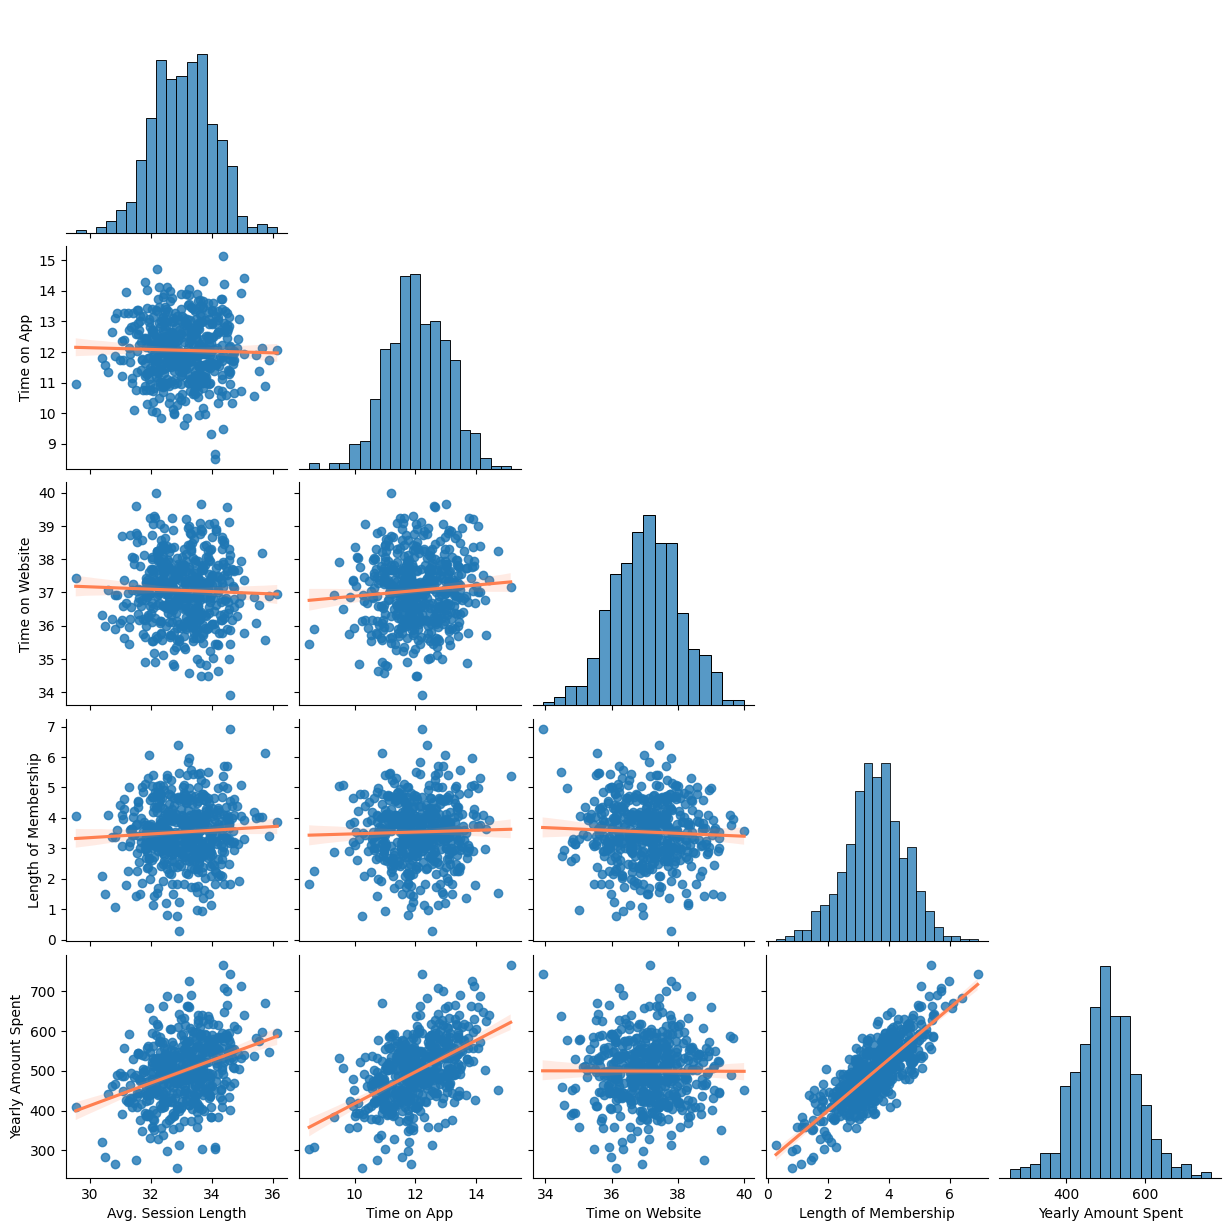

In [27]:
sns.pairplot(data = data_soporte, corner=True, kind="reg",plot_kws={'line_kws':{'color':'coral'}})

plt.show()

#### Selección de las Features

In [28]:
y = df['Yearly Amount Spent']
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [30]:
np.random.seed(33)
from sklearn import linear_model

modelo_linear = linear_model.LinearRegression()

In [31]:
modelo_linear.fit(X_train,y_train)

LinearRegression()

### **2.** Determine los pesos de cada feature que componen el modelo.


In [40]:
modelo_linear.intercept_

-1026.812477056024

In [34]:
modelo_linear.coef_

array([25.28329571, 38.71115608,  0.16042306, 61.7677713 ])

In [35]:
pd.DataFrame(modelo_linear.coef_, index=X.columns,
                    columns=['Coeficientes'])

,Coeficientes
Avg. Session Length,25.283296
Time on App,38.711156
Time on Website,0.160423
Length of Membership,61.767771


### **3.** A partir del punto anterior, proceda a la selección de features.


In [57]:
corr = data_soporte.corr()
corr.style.background_gradient(cmap='coolwarm')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [41]:
data_soporte.head(1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054


In [45]:
# 'Yearly Amount Spent' = -1026.812 + 25.283 * 'Avg. Session Length' + 38.711 * 'Time on App' + 0.1604 * 'Time on Website'+ 61.767 *'Length of Membership'

-1026.812 + 25.283296 * 34.497268	 + 38.711156 * 12.655651	+  0.160423 * 39.577668 + 61.767771 * 4.082621

593.8310854192391

#### Se extrae el Feature 'Time on Website' ya que se aprecia que no tiene una correlación lineal muy débil con la Feature Target.

In [44]:
# 'Yearly Amount Spent' = -1026.812 + 25.283 * 'Avg. Session Length' + 38.711 * 'Time on App' + 61.767 *'Length of Membership'

-1026.812 + 25.283296 * 34.497268	 + 38.711156 * 12.655651	+ 61.767771 * 4.082621

587.4819171856751

### **4.** Realice el proceso de validación cruzada para determinar el nivel de ajuste del modelo y haga la comparación de resultados entre train y test set.


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

y_pred = modelo_linear.predict(X_test)

r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = metrics.mean_squared_error(y_test,y_pred)**.5

print('Métricas del modelo - y_test || X_test')
print('')
print('El R^2 es de: ', round(r2*100,3),'%.')
print('El R^2 adjustado es de:',round(Adj_r2*100,3),'%.')
print('')
print('El MAE es de: ', round(MAE,3))
print('El MSE es de:: ', round(MSE,3))
print('El RMSE es de:: ', round(RMSE,3))

Métricas del modelo - y_test || X_test

El R^2 es de:  98.753 %.
El R^2 adjustado es de: 98.701 %.

El MAE es de:  7.873
El MSE es de::  96.595
El RMSE es de::  9.828


### **5.** Determine las métricas de error tanto, train como en test.


In [75]:
y_pred_train = modelo_linear.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
Adj_r2_train = 1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


MAE_train  = metrics.mean_absolute_error(y_train, y_pred_train)
MSE_train  = metrics.mean_squared_error(y_train, y_pred_train)
RMSE_train  = metrics.mean_squared_error(y_train, y_pred_train)**.5

print('Métricas del modelo - y_train || X_train')
print('')
print('El R^2 es de: ', round(r2_train*100,3),'%.')
print('El R^2 adjustado es de:',round(Adj_r2_train*100,3),'%.')
print('')
print('El MAE es de: ', round(MAE_train,3))
print('El MSE es de:: ', round(MSE_train,3))
print('El RMSE es de:: ', round(RMSE_train,3))

Métricas del modelo - y_train || X_train

El R^2 es de:  98.315 %.
El R^2 adjustado es de: 98.298 %.

El MAE es de:  7.901
El MSE es de::  99.453
El RMSE es de::  9.973


### **6.** Haga los diagramas de error y de residuales en el set de test.


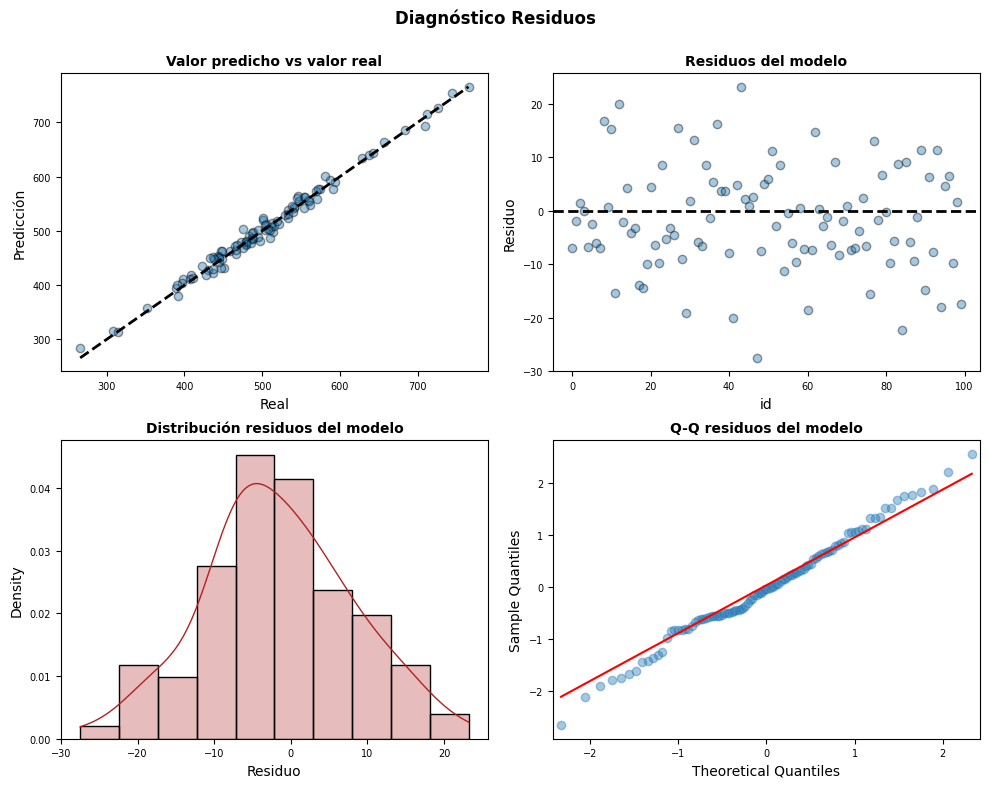

In [56]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].scatter(y_test, y_pred, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', color = 'black', lw=2
)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), y_test - y_pred,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_test - y_pred,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_test - y_pred,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico Residuos', fontsize = 12, fontweight = "bold")
plt.show();

### **7.** En base a lo anterior, ¿Se puede decir que el modelo es generalizable?

**R.-** El modelo  generaliza bien, de manera que la variable dependiente está relacionada linealmente con los factores y las covariables a exepción de la variable 'Time on Website' que puede ser que el tiempo en el sitio Web no otorgue importancia o peso al 'Yearly Amount Spent' por lo cual se debe hacer campañas para mejorar esto o cambiar aspectos  ala pagina Web.

In [84]:
y2 = df['Yearly Amount Spent']
X2 = df[['Avg. Session Length','Time on App','Length of Membership']]

In [85]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 33)

In [86]:
np.random.seed(33)

modelo_linear2 = linear_model.LinearRegression()

In [87]:
modelo_linear2.fit(X_train2,y_train2)

LinearRegression()

In [88]:
pd.DataFrame(modelo_linear2.coef_, index=X2.columns,
                    columns=['Coeficientes'])

,Coeficientes
Avg. Session Length,25.276215
Time on App,38.728478
Length of Membership,61.762522


In [89]:
y_pred2 = modelo_linear2.predict(X_test2)

r22 = r2_score(y_test2, y_pred2)
Adj_r22 = 1 - (1-r2_score(y_test2, y_pred2)) * (len(y_test2)-1)/(len(y_test2)-X_test2.shape[1]-1)


MAE2 = metrics.mean_absolute_error(y_test2,y_pred2)
MSE2 = metrics.mean_squared_error(y_test2,y_pred2)
RMSE2 = metrics.mean_squared_error(y_test2,y_pred2)**.5

print('Métricas del modelo - y_test2 || X_test2')
print('')
print('El R^2 es de: ', round(r22*100,3),'%.')
print('El R^2 adjustado es de:',round(Adj_r22*100,3),'%.')
print('')
print('El MAE es de: ', round(MAE2,3))
print('El MSE es de:: ', round(MSE2,3))
print('El RMSE es de:: ', round(RMSE2,3))

Métricas del modelo - y_test2 || X_test2

El R^2 es de:  98.747 %.
El R^2 adjustado es de: 98.708 %.

El MAE es de:  7.892
El MSE es de::  97.092
El RMSE es de::  9.854
